In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
df5 = pd.read_json("C:\\Users\\stnav\\Bengaluru Housing Price Estimator Project\\Code\\cleaned_dataset")
df5

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,ELECTRONIC CITY PHASE II,1056.0,2,1,39.07,2,3699.81
1,Plot Area,CHIKKA TIRUPATHI,2600.0,5,3,120.00,4,4615.38
2,Built-up Area,UTTARAHALLI,1440.0,2,3,62.00,3,4305.56
3,Super built-up Area,LINGADHEERANAHALLI,1521.0,3,1,95.00,3,6245.89
4,Super built-up Area,KOTHANUR,1200.0,2,1,51.00,2,4250.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,WHITEFIELD,3453.0,4,0,231.00,5,6689.83
13316,Super built-up Area,Other,3600.0,5,0,400.00,4,11111.11
13317,Built-up Area,RAJA RAJESHWARI NAGAR,1141.0,2,1,60.00,2,5258.55
13318,Super built-up Area,PADMANABHANAGAR,4689.0,4,1,488.00,4,10407.34


In [139]:
df5.dtypes

area_type          object
location           object
total_sqft        float64
bath                int64
balcony             int64
price             float64
bhk                 int64
price_per_sqft    float64
dtype: object

In [140]:
df5.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,13274.000000,13274.000000,13274.000000,13274.000000,13274.000000,1.327400e+04
mean,1572.225941,2.687359,1.513410,112.453654,2.801718,7.883254e+03
std,1254.823072,1.336158,0.863733,149.070368,1.291591,1.064303e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678300e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.227640e+03
50%,1280.000000,2.000000,2.000000,72.000000,3.000000,5.416670e+03
75%,1690.000000,3.000000,2.000000,120.000000,3.000000,7.293507e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


### Outlier detection and removal :  1) Total Sqft - Assuming that a typhical room is 300sqft and not less than 300sqft.

In [141]:
df5[(df5['total_sqft']/df5['bhk'])<=300]

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Plot Area,Other,1020.0,6,0,370.0,6,36274.51
45,Plot Area,HSR LAYOUT,600.0,9,0,200.0,8,33333.33
58,Plot Area,MURUGESHPALYA,1407.0,4,1,150.0,6,10660.98
68,Plot Area,DEVARACHIKKANAHALLI,1350.0,7,0,85.0,8,6296.30
70,Plot Area,Other,500.0,3,2,100.0,3,20000.00
...,...,...,...,...,...,...,...,...
13281,Plot Area,MARGONDANAHALLI,1375.0,5,1,125.0,5,9090.91
13300,Plot Area,HOSAKEREHALLI,1500.0,6,2,145.0,5,9666.67
13303,Plot Area,VIDYARANYAPURA,774.0,5,3,70.0,5,9043.93
13306,Plot Area,Other,1200.0,5,0,325.0,4,27083.33


In [142]:
df5.shape

(13274, 8)

In [143]:
df6 = df5[~((df5['total_sqft']/df5['bhk'])<=300)]
df6.shape

(12348, 8)

### Outliers in total_sqft (926 rows) are removed.

### Outlier detection and removal :  2) Price per sqft - the min & max values seems to be on extream sides.

In [144]:
df6['price_per_sqft'].describe()

count     12348.000000
mean       6181.803923
std        4056.245768
min         267.830000
25%        4166.670000
50%        5241.940000
75%        6807.822500
max      176470.590000
Name: price_per_sqft, dtype: float64

### Assuming that our dataset is normal distribution, then +/- of 1 Standard Deviation with Mean of price_per_sqft, should be fetching us around 68.26% and anything beyond would be an outlier.

In [145]:
def outlier_price_removal(df):
    df_out = pd.DataFrame()
    for place, subframe in df.groupby('location'):
        mean = np.mean(subframe['price_per_sqft'])
        std = np.std(subframe['price_per_sqft'])
        reduced_df = subframe[(subframe['price_per_sqft'] > (mean-std)) & (subframe['price_per_sqft'] <= (mean+std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7 = outlier_price_removal(df6)
df7.shape

(10068, 8)

### More than 2000 outliers in price_per_sqft are removed, which leaves us with a more reliable data for the model. 

In [146]:
df7

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,1ST BLOCK JAYANAGAR,2850.0,4,1,428.00,4,15017.54
1,Super built-up Area,1ST BLOCK JAYANAGAR,1630.0,3,2,194.00,3,11901.84
2,Super built-up Area,1ST BLOCK JAYANAGAR,1875.0,2,3,235.00,3,12533.33
3,Built-up Area,1ST BLOCK JAYANAGAR,1200.0,2,0,130.00,3,10833.33
4,Super built-up Area,1ST BLOCK JAYANAGAR,1235.0,2,2,148.00,2,11983.81
...,...,...,...,...,...,...,...,...
10063,Super built-up Area,YESHWANTHPUR,1676.0,3,0,92.13,3,5497.02
10064,Super built-up Area,YESHWANTHPUR,2503.0,3,3,138.00,3,5513.38
10065,Super built-up Area,YESHWANTHPUR,1855.0,3,3,135.00,3,7277.63
10066,Super built-up Area,YESHWANTHPUR,1876.0,3,3,160.00,3,8528.78


### Outlier detection and removal : 3) To find out if 2BHK and 3BHK houses of same sqft has proportional prices are not. (Assuming same total_sqft of 2BHK & 3BHK should have price of 2BHK < 3BHK)

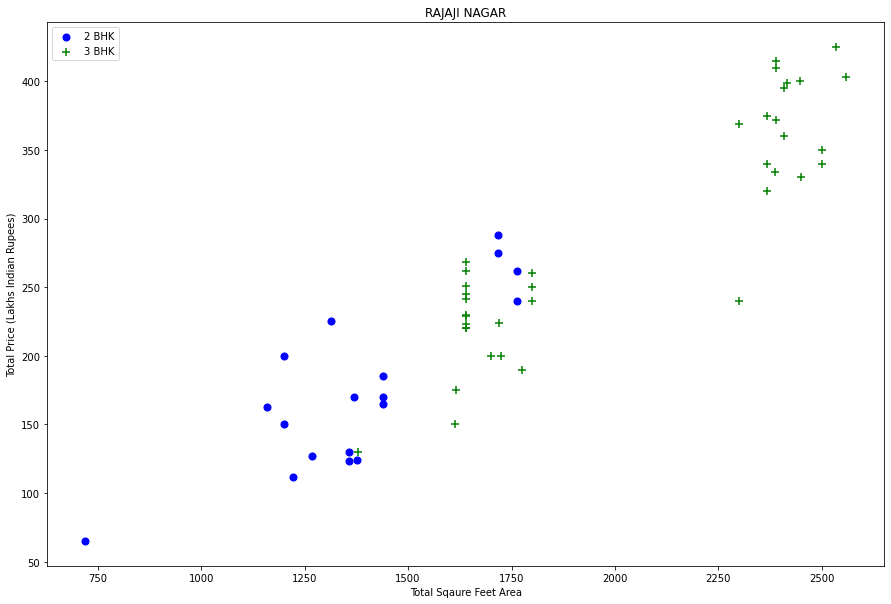

In [147]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df['location'] == str.upper(location)) & (df['bhk'] == 2)]
    bhk3 = df[(df['location'] == str.upper(location)) & (df['bhk'] == 3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'], bhk3['price'], marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel('Total Sqaure Feet Area')
    plt.ylabel('Total Price (Lakhs Indian Rupees)')
    plt.title(str.upper(location))
    plt.legend()
    
plot_scatter_chart(df7, 'Rajaji Nagar')

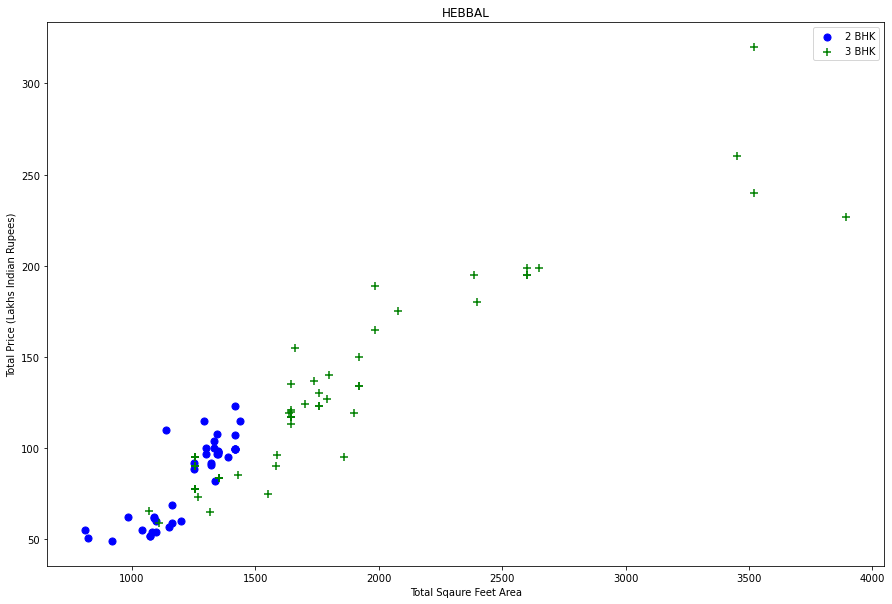

In [148]:
plot_scatter_chart(df7, 'Hebbal')

### It appears in some cases where 3 BHK house is costing less compared to 2 BHK of same total_sqft in both the above examples, we should be eliminating these outliers as prices of 3BHK should be greater than 2 BHK of equal total_sqft.

In [149]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7189, 8)

### Plotting the same graph again, we can see the difference as outliers of BHK are eliminated.

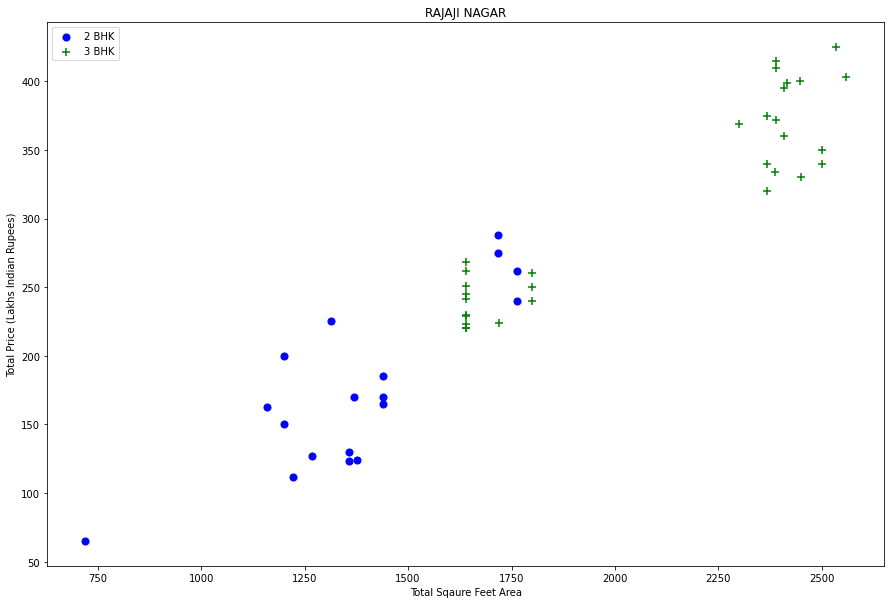

In [150]:
plot_scatter_chart(df8, 'Rajaji Nagar')

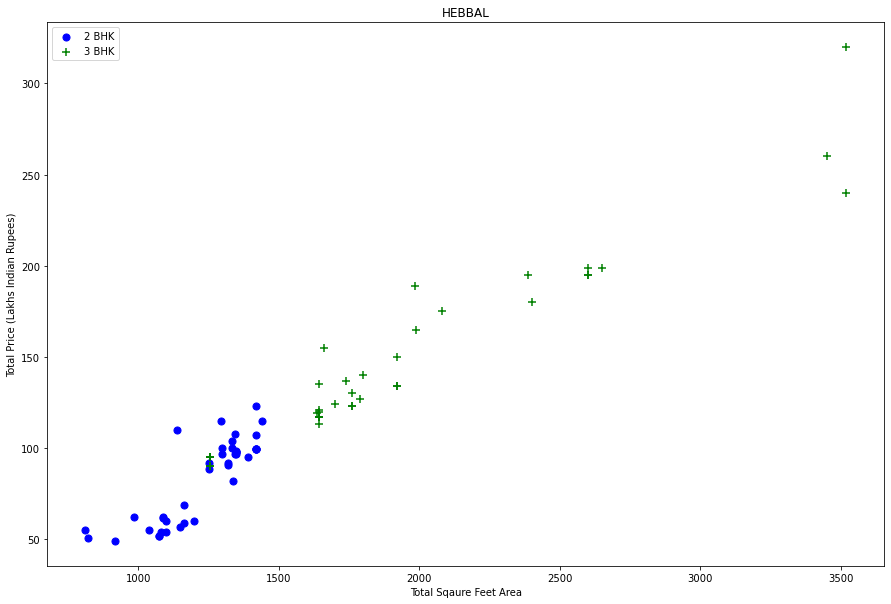

In [151]:
plot_scatter_chart(df8, 'Hebbal')

### Outlier detection and removal : 4) No. of Bath rooms - It appears that there are more bath rooms than the bedrooms. Assuming that all the bedrooms has one bath room plus a guest bath room, should be the generic scenario here anything greater should be considered outlier.

In [152]:
df8['bath'].unique()

array([ 4,  3,  2,  8,  5,  1,  6,  7,  9, 12, 16, 13], dtype=int64)

In [153]:
df8[df8['bath']>10]

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
5159,Super built-up Area,NEELADRI NAGAR,4000.0,12,0,160.0,10,4000.00
5815,Super built-up Area,Other,12000.0,12,0,525.0,10,4375.00
5900,Super built-up Area,Other,10000.0,16,0,550.0,16,5500.00
6615,Super built-up Area,Other,6000.0,12,0,150.0,11,2500.00
6941,Super built-up Area,Other,5425.0,13,0,275.0,13,5069.12


Text(0.5, 1.0, 'Number of bath rooms counts')

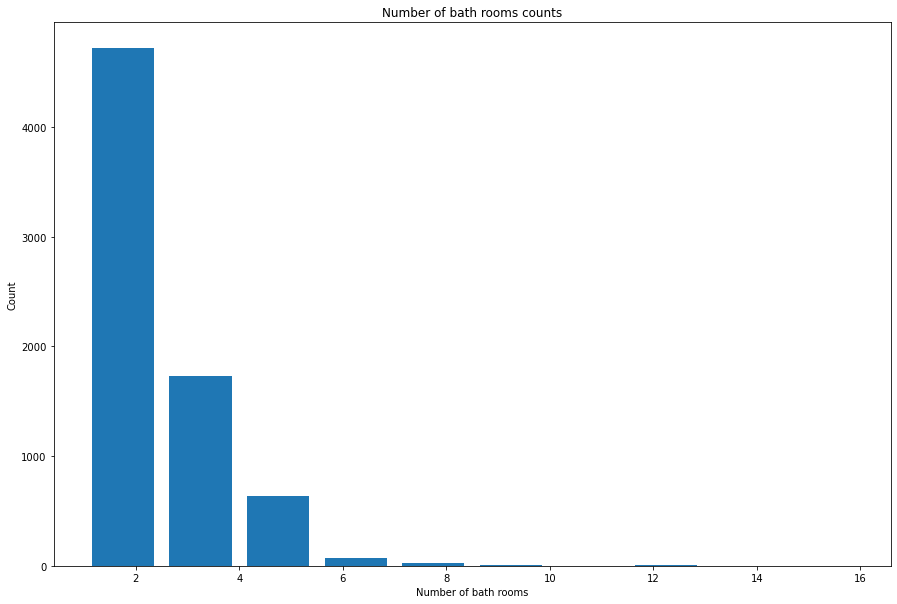

In [154]:
plt.rcParams['figure.figsize'] = (15,10)
plt.hist(df8['bath'], rwidth=0.8)
plt.xlabel('Number of bath rooms')
plt.ylabel('Count')
plt.title('Number of bath rooms counts')

In [155]:
df9 = df8[df8['bath']<df8['bhk']+2]
df9.shape

(7116, 8)

In [156]:
df9

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,1ST BLOCK JAYANAGAR,2850.0,4,1,428.00,4,15017.54
1,Super built-up Area,1ST BLOCK JAYANAGAR,1630.0,3,2,194.00,3,11901.84
2,Super built-up Area,1ST BLOCK JAYANAGAR,1875.0,2,3,235.00,3,12533.33
3,Built-up Area,1ST BLOCK JAYANAGAR,1200.0,2,0,130.00,3,10833.33
4,Super built-up Area,1ST BLOCK JAYANAGAR,1235.0,2,2,148.00,2,11983.81
...,...,...,...,...,...,...,...,...
10058,Super built-up Area,YESHWANTHPUR,1692.0,3,3,108.00,3,6382.98
10060,Built-up Area,YESHWANTHPUR,2500.0,5,2,185.00,6,7400.00
10062,Super built-up Area,YESHWANTHPUR,1160.0,2,2,64.08,2,5524.14
10065,Super built-up Area,YESHWANTHPUR,1855.0,3,3,135.00,3,7277.63


Text(0.5, 1.0, 'Price per sqft counts')

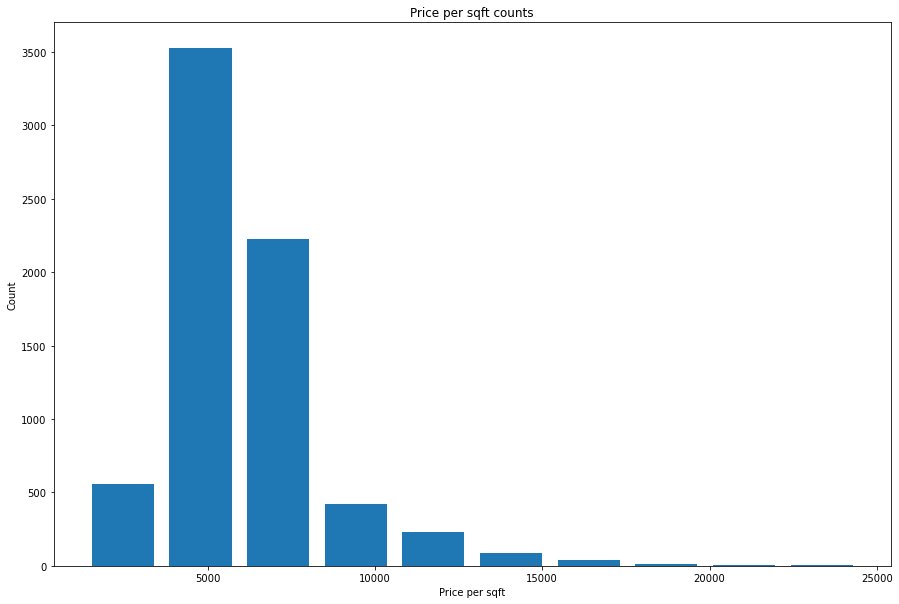

In [159]:
plt.rcParams['figure.figsize'] = (15,10)
plt.hist(df9['price_per_sqft'], rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')
plt.title('Price per sqft counts')

### Dropping field price_per_sqft, which is not required for model building.

In [160]:
df9.drop(['price_per_sqft'], axis='columns', inplace=True)
df9

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1ST BLOCK JAYANAGAR,2850.0,4,1,428.00,4
1,Super built-up Area,1ST BLOCK JAYANAGAR,1630.0,3,2,194.00,3
2,Super built-up Area,1ST BLOCK JAYANAGAR,1875.0,2,3,235.00,3
3,Built-up Area,1ST BLOCK JAYANAGAR,1200.0,2,0,130.00,3
4,Super built-up Area,1ST BLOCK JAYANAGAR,1235.0,2,2,148.00,2
...,...,...,...,...,...,...,...
10058,Super built-up Area,YESHWANTHPUR,1692.0,3,3,108.00,3
10060,Built-up Area,YESHWANTHPUR,2500.0,5,2,185.00,6
10062,Super built-up Area,YESHWANTHPUR,1160.0,2,2,64.08,2
10065,Super built-up Area,YESHWANTHPUR,1855.0,3,3,135.00,3


In [162]:
df9.to_json("C:\\Users\\stnav\\Bengaluru Housing Price Estimator Project\\Code\\outliers_cleaned_dataset")